In [125]:
import pandas as pd
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model


In [62]:
test_dir = "/Users/marianazuniga/Documents/GitHub/Neurociencias-2025-2/S03_datasets/Brain_tumor/TEST"
train_dir = "/Users/marianazuniga/Documents/GitHub/Neurociencias-2025-2/S03_datasets/Brain_tumor/TRAIN"
val_dir ="/Users/marianazuniga/Documents/GitHub/Neurociencias-2025-2/S03_datasets/Brain_tumor/VAL"
df = pd.read_csv("/Users/marianazuniga/Documents/GitHub/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv")



In [ ]:

df['Image'] = df['Image'] + '.jpg'

# Función para filtrar DataFrame según directorio
def filter_df(directory, df):
    available_files = set(os.listdir(directory))  
    return df[df['Image'].isin(available_files)]

# Filtrar cada conjunto
df_train = filter_df(train_dir, df)
df_val = filter_df(val_dir, df)
df_test = filter_df(test_dir, df)

df_train['Class'] = df_train['Class'].astype(str)
df_val['Class'] = df_val['Class'].astype(str)
df_test['Class'] = df_test['Class'].astype(str)

# Imprimir resultados
print("\nTotal de imágenes en TRAIN:", len(df_train))
print("Total de imágenes en VAL:", len(df_val))
print("Total de imágenes en TEST:", len(df_test))


Total de imágenes en TRAIN: 2633
Total de imágenes en VAL: 565
Total de imágenes en TEST: 564


/var/folders/51/q0m3j69d6rz8zc1pdvfkk6tm0000gn/T/ipykernel_51907/791560658.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Class'] = df_train['Class'].astype(str)
/var/folders/51/q0m3j69d6rz8zc1pdvfkk6tm0000gn/T/ipykernel_51907/791560658.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Class'] = df_val['Class'].astype(str)
/var/folders/51/q0m3j69d6rz8zc1pdvfkk6tm0000gn/T/ipykernel_51907/791560658.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [109]:

# Generadores
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

test_val_datagen = ImageDataGenerator(rescale=1./255)

# Parámetros comunes
target_size = (150, 150)
batch_size = 32

# Crear generadores
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col='Image',
    y_col='Class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = test_val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=val_dir,
    x_col='Image',
    y_col='Class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = test_val_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=test_dir,
    x_col='Image',
    y_col='Class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2633 validated image filenames belonging to 2 classes.
Found 565 validated image filenames belonging to 2 classes.
Found 564 validated image filenames belonging to 2 classes.


**Modelo de CNN**

In [110]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.6229 - loss: 0.6400 - precision_22: 0.5948 - recall_22: 0.5463 - val_accuracy: 0.7823 - val_loss: 0.4856 - val_precision_22: 0.9118 - val_recall_22: 0.5277
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 286ms/step - accuracy: 0.7730 - loss: 0.4861 - precision_22: 0.7394 - recall_22: 0.7626 - val_accuracy: 0.7947 - val_loss: 0.4804 - val_precision_22: 0.9685 - val_recall_22: 0.5234
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 328ms/step - accuracy: 0.7957 - loss: 0.4531 - precision_22: 0.7904 - recall_22: 0.7413 - val_accuracy: 0.7912 - val_loss: 0.5174 - val_precision_22: 0.9333 - val_recall_22: 0.5362
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 31s 373ms/step - accuracy: 0.8030 - loss: 0.4352 - precision_22: 0.7789 - recall_22: 0.8055 - val_accuracy: 0.7752 - val_loss: 0.5609 - val_precision_22: 0.9737 - val_recall_22: 0.4723
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 322ms/step - accuracy: 0.8306 - loss: 0.3926 - precision_22: 0.810

In [111]:
# Evaluar con el conjunto de test
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Precision: {test_prec:.2f}, Recall: {test_rec:.2f}")


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8897 - loss: 0.2631 - precision_22: 0.9287 - recall_22: 0.7735
Test Accuracy: 0.86, Precision: 0.93, Recall: 0.75


Es un buen acuracy, pero se puede mejorar 

**Mejorar el accuracy ***


In [ ]:
model_2 = Sequential([
    # Bloque 1 - Captura bordes y texturas
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.1),
    
    # Bloque 2 - Detecta patrones simples
    Conv2D(64, (3, 3), activation='relu' , padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    
    # Bloque 3 - Reconoce estructuras complejas
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    
    # Clasificación
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_2.compile(
optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', 
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
history = model_2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,  # Más épocas por mayor profundidad
    validation_data=val_generator,
    validation_steps=len(val_generator),
    
    )

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 79s 955ms/step - accuracy: 0.7867 - loss: 0.4632 - precision: 0.7735 - recall: 0.7401 - val_accuracy: 0.4159 - val_loss: 2.3300 - val_precision: 0.4159 - val_recall: 1.0000
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 991ms/step - accuracy: 0.7948 - loss: 0.4553 - precision: 0.7683 - recall: 0.7680 - val_accuracy: 0.4159 - val_loss: 3.6183 - val_precision: 0.4159 - val_recall: 1.0000
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 981ms/step - accuracy: 0.8047 - loss: 0.4193 - precision: 0.7976 - recall: 0.7796 - val_accuracy: 0.4159 - val_loss: 4.6940 - val_precision: 0.4159 - val_recall: 1.0000
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 79s 947ms/step - accuracy: 0.8423 - loss: 0.3591 - precision: 0.8274 - recall: 0.8225 - val_accuracy: 0.4159 - val_loss: 4.4770 - val_precision: 0.4159 - val_recall: 1.0000
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.8182 - loss: 0.3961 - precision: 0.7981 - recall: 0.8092 - val_accuracy: 0.4159 - val_loss: 

In [133]:
# Evaluar con el conjunto de test
test_loss, test_acc, test_prec, test_rec = model_2.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}, Precision: {test_prec:.2f}, Recall: {test_rec:.2f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.5978 - loss: 0.5997 - precision: 0.4871 - recall: 0.9966
Test Accuracy: 0.66, Precision: 0.58, Recall: 1.00


Comporar CNN con modelos anteriores

Cada bloque contiene capas Conv2D con activación ReLU, BatchNormalization para estabilizar el entrenamiento, MaxPooling2D para reducir dimensiones espaciales y Dropout para prevenir sobreajuste (con tasas progresivas de 0.1 a 0.3). La red finaliza con una capa Flatten para aplanar los datos, seguida de dos capas Dense (512 neuronas con ReLU y 1 neurona con sigmoide para la salida binaria). El modelo se compila con el optimizador Adam (tasa de aprendizaje 0.0001), función de pérdida binary_crossentropy y métricas de accuracy, precisión y recall.

In [127]:
def extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        batch_x, batch_y = generator[i]
        features.extend(batch_x)
        labels.extend(batch_y)
    return np.array(features), np.array(labels)

# Extraer datos de train y test
X_train, y_train = extract_features(train_generator)
X_test, y_test = extract_features(test_generator)

# Aplanar imágenes para modelos clásicos
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# 5. Entrenar modelos clásicos
models = {
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=12, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7, metric='minkowski')
}

print("\n🔨 Entrenando modelos clásicos...")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} entrenado")

# 6. Evaluar modelo_v2 CNN y modelos clásicos
results = {}





🔨 Entrenando modelos clásicos...
SVM entrenado
Random Forest entrenado
KNN entrenado


OSError: [Errno 30] Read-only file system: '/comparacion_modelos_tumores.png'

<Figure size 1400x700 with 0 Axes>

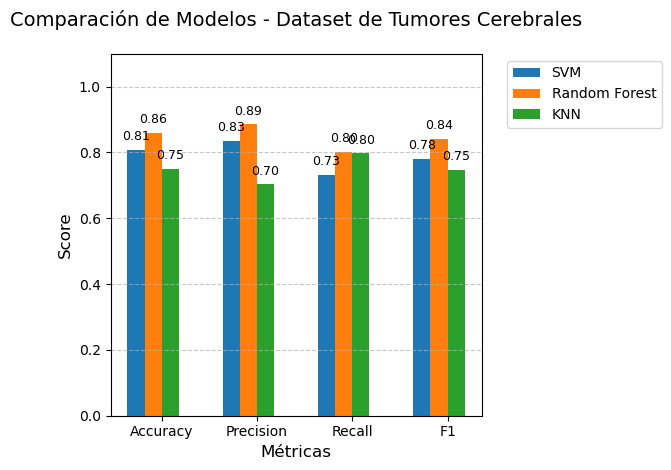

In [131]:
# Evaluar modelos clásicos
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

# 7. Visualización mejorada
plt.figure(figsize=(14, 7))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
x = np.arange(len(metrics))
width = 0.18

fig, ax = plt.subplots()
for i, (model_name, _) in enumerate(results.items()):
    ax.bar(x + i*width, 
           [results[model_name][m] for m in metrics],
           width, 
           label=model_name,
           color=colors[i])

ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparación de Modelos - Dataset de Tumores Cerebrales', 
             fontsize=14, pad=20)
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir valores en las barras
for i, (model_name, _) in enumerate(results.items()):
    for j, metric in enumerate(metrics):
        height = results[model_name][metric]
        ax.text(x[j] + i*width, height + 0.02, 
                f'{height:.2f}', 
                ha='center', 
                va='bottom',
                fontsize=9)

plt.tight_layout()
plt.savefig('comparacion_modelos_tumores.png', dpi=300, bbox_inches='tight')
plt.show()